In [291]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [292]:
train = pd.read_csv('G:/ml/house prices/train.csv')
test = pd.read_csv('G:/ml/house prices/test.csv')

In [293]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [294]:
import matplotlib.pyplot as plt
plt.style.use(style = 'ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [295]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

1.8828757597682129


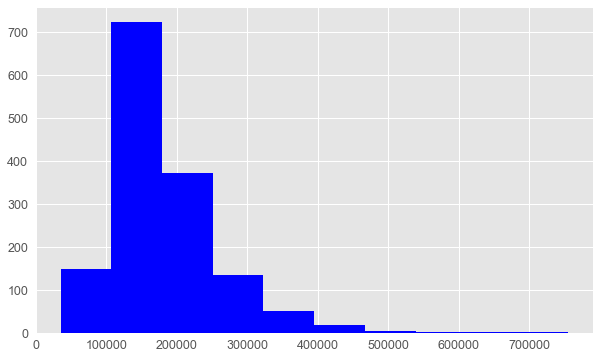

In [298]:
print(train.SalePrice.skew())
plt.hist(train.SalePrice , color ='blue')
plt.show()


0.12133506220520406


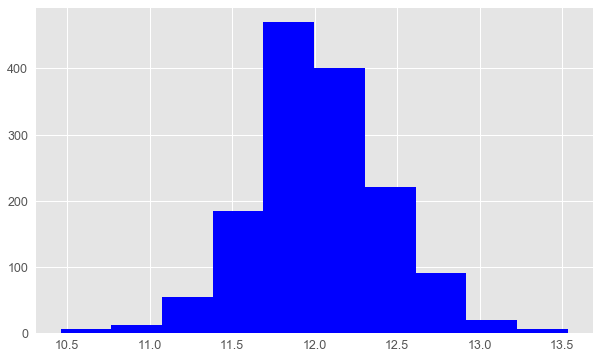

In [297]:
target = np.log(train.SalePrice)
print(target.skew())
plt.hist(target,color = 'blue')
plt.show()

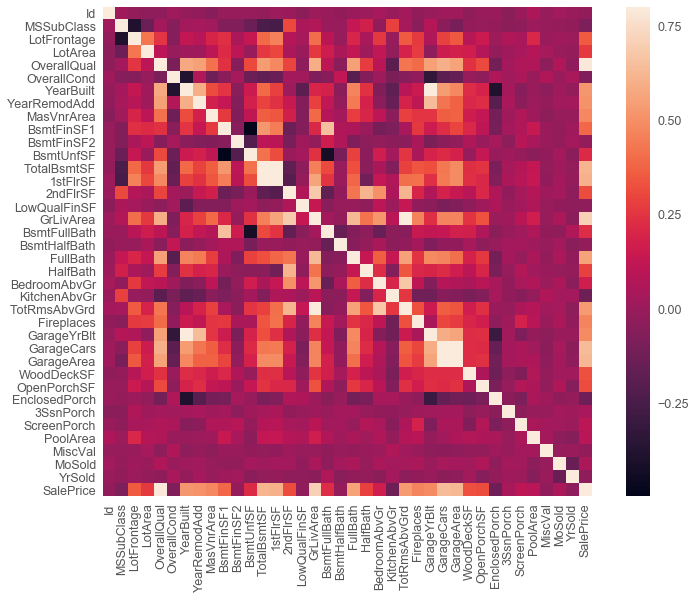

In [184]:
corrmat = train.corr() 
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax = 0.8, square =True);

ValueError: dictionary update sequence element #0 has length 7; 2 is required

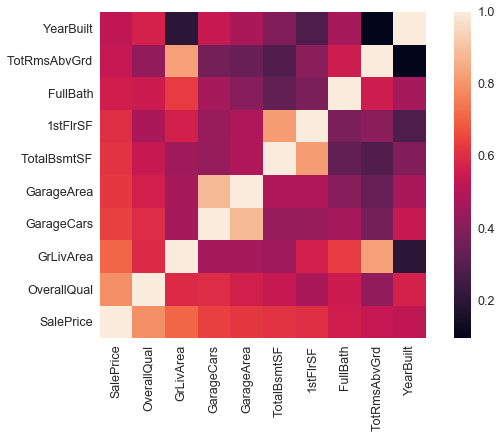

In [185]:
k = 10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm =np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.25)
hm =sns.heatmap(cm,cbar =True, annot = True, square = True, fmt='.2f',annot_kws ={'size:10'}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [186]:
numeric_features = train.select_dtypes(include = [np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [187]:
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending = False)[:10],'\n')
print(corr['SalePrice'].sort_values(ascending = False)[-5:])

(SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64, '\n')
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [188]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [189]:
quality_pivot = train.pivot_table(index = 'OverallQual', values = 'SalePrice', aggfunc = np.median)
print(quality_pivot)

             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390


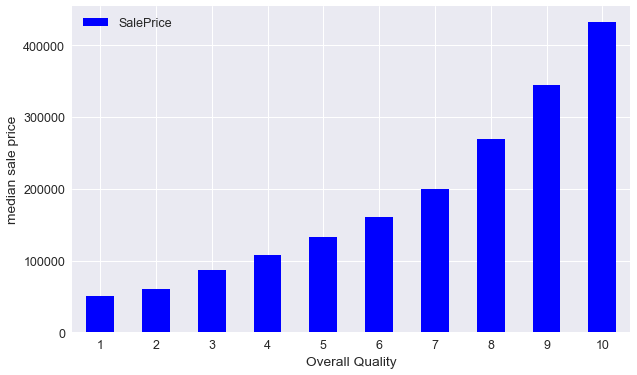

In [190]:
quality_pivot.plot(kind = 'bar',color = 'blue')
plt.xlabel('Overall Quality')
plt.ylabel('median sale price')
plt.xticks(rotation = 0)
plt.show()

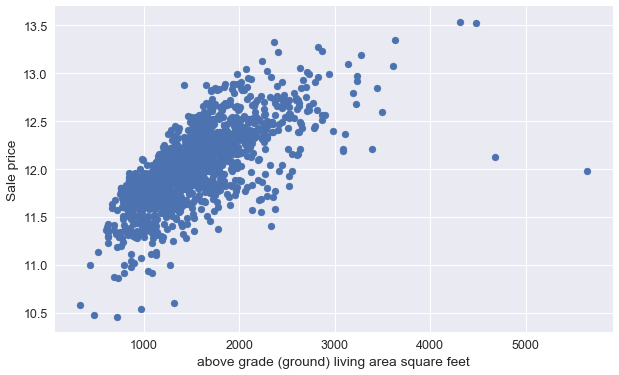

In [191]:
plt.scatter(x = train['GrLivArea'], y= target)
plt.ylabel('Sale price')
plt.xlabel('above grade (ground) living area square feet')
plt.show()

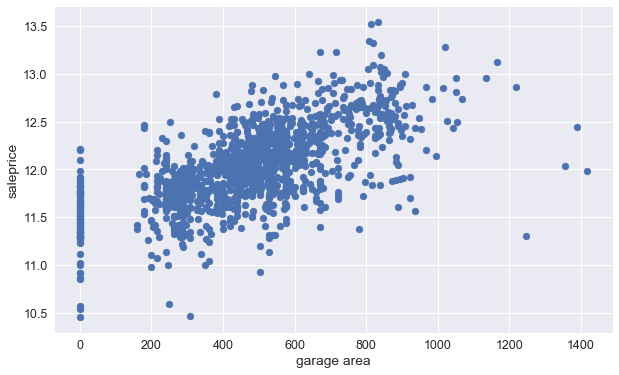

In [192]:
plt.scatter(x= train['GarageArea'] , y= target)
plt.ylabel('saleprice')
plt.xlabel('garage area')
plt.show()

In [193]:
train = train[train['GarageArea']<1200]

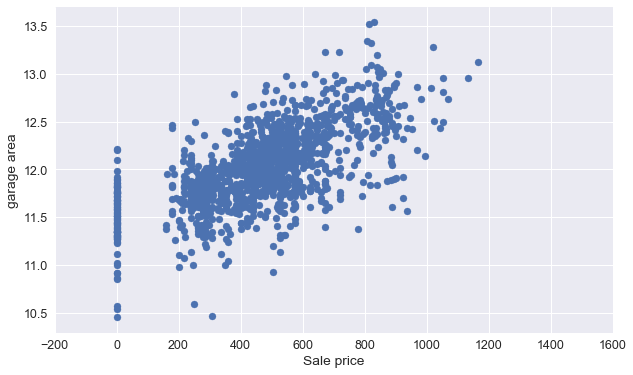

In [194]:
plt.scatter(x = train['GarageArea'], y = np.log(train.SalePrice))
plt.xlim(-200,1600)
plt.xlabel('Sale price')
plt.ylabel('garage area')
plt.show()

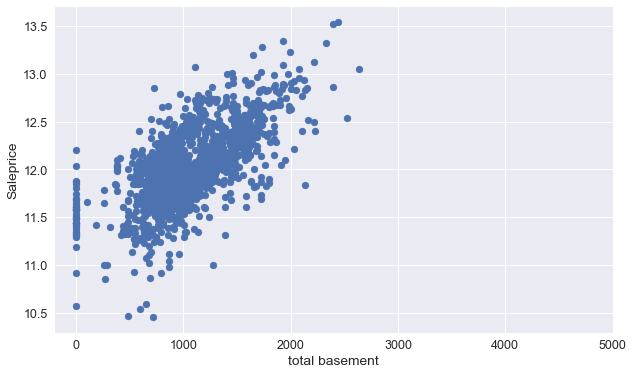

In [195]:
train = train[train['TotalBsmtSF'] <3000]
plt.scatter(x = train['TotalBsmtSF'], y = np.log(train.SalePrice))
plt.xlim(-200,5000)
plt.xlabel('total basement')
plt.ylabel('Saleprice')
plt.show()

In [196]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending =False)[:25])
nulls.columns = ['Null count']
nulls.index.name = 'Feature'
nulls


,Null count
Feature,
PoolQC,1445
MiscFeature,1398
Alley,1360
Fence,1170
FireplaceQu,689
LotFrontage,257
GarageCond,81
GarageType,81
GarageYrBlt,81


In [221]:
categorical = train.select_dtypes(exclude = [np.number])
categorical.describe()
train=train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFinType2'],axis=1)


ValueError: labels ['PoolQC' 'MiscFeature' 'Alley' 'Fence' 'FireplaceQu' 'LotFrontage'
 'GarageCond' 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageQual'
 'BsmtExposure' 'BsmtFinType1' 'BsmtCond' 'BsmtQual' 'BsmtFinType2'] not contained in axis

In [222]:
data = train.select_dtypes(include = [np.number]).interpolate().dropna()

In [223]:
sum(data.isnull().sum() !=0)

0

In [224]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis =1)

In [225]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.33, random_state = 42)

In [281]:
from sklearn import linear_model
clf = linear_model.Ridge(alpha =100)
clf.fit(X_train,y_train)


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [282]:
from sklearn.metrics import accuracy_score
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.907884757567473
0.8837358053343861


In [283]:
prd = clf.predict(X_test)

In [284]:
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,prd))

0.01846838839206748


In [285]:
feats =test.select_dtypes(include =[np.number]).drop(['Id'], axis =1).interpolate()

In [286]:
prediction = clf.predict(feats)
print(prediction)

[11.75097932 11.90537703 12.08039442 ... 12.08377135 11.65362034
 12.38600863]


In [287]:
final_prediction = np.exp(prediction)

In [289]:
submission5= pd.DataFrame({'Id': test['Id'],'SalePrice': final_prediction})


In [290]:
submission5.to_csv('G:/ml/house prices/submission5.csv',index = False)